# Effects of Air Pollution Exposure on Covid-19 Mortality

Author: Ho Jia Min

Date: 25/4/2020

Purpose: To investigate whether long-term exposure to air pollution increases the risk of Covid-19 deaths. 

Methodology: Dataframe processing using pandas and numpy, visualization using matplotlib and seaborn.

Findings: Initial observations show that there is a possible connection between exposure to air pollution and Covid-19 mortality. However, other factors such as population density could also explain why highly polluted states concentrate higher number of deaths due to Covid-19.

Recommendation/Conclusion: This highlights the importance of reducing air pollution for the protection of human health, both in relation to the Covid-19 pandemic and beyond.

### Introduction

Air pollution is associated with heart and lung problems. Fine pollutant particles from sources such as auto exhaust or power plants can penetrate deeply into lung tissue and enter the bloodstream. Exposure to fine pollutant particles has been linked to problems with respiratory and cardiovascular functions (Sun & Zhu 2019). 

The majority of the pre-existing conditions that increase the risk of death for Covid-19 are the same diseases that are affected by long-term exposure to air pollution (Wolfel et al. 2020). Therefore, this project aims to investigate whether long-term average (3 years) exposure to fine particulate matter (PM2.5) increases the risk of Covid-19 deaths in the United States.


### Dataset Description

COVID-19 State Data:
https://www.kaggle.com/nightranger77/covid19-state-data#COVID19_state.csv 

Pollution: 
Average exposure of the general public to particulate matter of 2.5 microns or less (PM2.5) measured in micrograms  per cubic meter (3-year estimate) 
https://www.americashealthrankings.org/explore/annual/measure/air/state/ALL 

In [17]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('COVID19_state.csv')
df

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,11473,337,9,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.60,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,48387,5832,201,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.80,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,34551,2599,45,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.40,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,58697,5769,249,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.30,89.8,0.33,0.36,0.30,03/16/20
4,California,308700,37369,1469,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.40,95.0,0.33,0.40,0.26,03/19/20
5,Colorado,52324,11262,552,5845526,56.4011,0.4586,1597,56846,63882,...,89,6804,6.7,1.0,45.10,86.2,0.33,0.40,0.27,03/23/20
6,Connecticut,71497,23100,1639,3563077,735.8689,0.4945,674,74561,76342,...,32,9859,7.2,1.0,49.00,88.0,0.30,0.38,0.32,03/17/20
7,District of Columbia,15502,3361,139,720687,11814.5410,0.5420,314,47285,200277,...,10,11944,9.8,0.0,54.65,100.0,0.30,0.48,0.22,03/16/20
8,Delaware,16912,3308,92,982895,504.3073,0.4522,186,51449,77253,...,7,10254,8.3,0.0,55.30,83.3,0.30,0.37,0.33,03/16/20
9,Florida,303050,29648,987,21992985,410.1256,0.4852,5604,49417,48318,...,217,8076,7.4,7.0,70.70,91.2,0.29,0.37,0.35,03/16/20


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 50
Data columns (total 28 columns):
State                  49 non-null object
Tested                 49 non-null int64
Infected               49 non-null int64
Deaths                 49 non-null int64
Population             49 non-null int64
Pop Density            49 non-null float64
Gini                   49 non-null float64
ICU Beds               49 non-null int64
Income                 49 non-null int64
GDP                    49 non-null int64
Unemployment           49 non-null float64
Sex Ratio              49 non-null float64
Smoking Rate           49 non-null float64
Flu Deaths             49 non-null float64
Respiratory Deaths     49 non-null float64
Physicians             49 non-null int64
Hospitals              49 non-null int64
Health Spending        49 non-null int64
Pollution              49 non-null float64
Med-Large Airports     49 non-null float64
Temperature            49 non-null float64
Urban          

In [19]:
# check for null values
df.isnull().sum()

State                  0
Tested                 0
Infected               0
Deaths                 0
Population             0
Pop Density            0
Gini                   0
ICU Beds               0
Income                 0
GDP                    0
Unemployment           0
Sex Ratio              0
Smoking Rate           0
Flu Deaths             0
Respiratory Deaths     0
Physicians             0
Hospitals              0
Health Spending        0
Pollution              0
Med-Large Airports     0
Temperature            0
Urban                  0
Age 0-25               0
Age 26-54              0
Age 55+                0
School Closure Date    3
dtype: int64

In [20]:
# Drop outliers (california and district of columbia with unusual values that affected findings)

df = df.drop(4)
df = df.drop(7)

In [37]:
# Data showing total number of infected cases and death cases, hence, recalculate death rate and infected rate
# Add death rate and infected rate to df

df['Death Rate']=(df['Deaths']/df['Infected'])*100
df['Infected Rate']=(df['Infected']/df['Population'])*100
df

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date,Death Rate,Infected Rate
0,Alaska,11473,337,9,734002,1.2863,0.4081,119,59687,73205,...,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20,2.670623,0.045913
1,Alabama,48387,5832,201,4908621,96.9221,0.4847,1533,42334,45219,...,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20,3.446502,0.118811
2,Arkansas,34551,2599,45,3038999,58.4030,0.4719,732,42566,42454,...,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20,1.731435,0.085522
3,Arizona,58697,5769,249,7378494,64.9550,0.4713,1559,43650,48055,...,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20,4.316173,0.078187
5,Colorado,52324,11262,552,5845526,56.4011,0.4586,1597,56846,63882,...,6.7,1.0,45.1,86.2,0.33,0.40,0.27,03/23/20,4.901438,0.192660
6,Connecticut,71497,23100,1639,3563077,735.8689,0.4945,674,74561,76342,...,7.2,1.0,49.0,88.0,0.30,0.38,0.32,03/17/20,7.095238,0.648316
8,Delaware,16912,3308,92,982895,504.3073,0.4522,186,51449,77253,...,8.3,0.0,55.3,83.3,0.30,0.37,0.33,03/16/20,2.781137,0.336557
9,Florida,303050,29648,987,21992985,410.1256,0.4852,5604,49417,48318,...,7.4,7.0,70.7,91.2,0.29,0.37,0.35,03/16/20,3.329061,0.134807
10,Georgia,101062,21883,881,10736059,186.6719,0.4813,2508,45745,55832,...,8.3,1.0,63.5,75.1,0.35,0.39,0.26,03/18/20,4.025956,0.203827
11,Hawaii,25909,596,12,1412687,219.9419,0.4420,201,54565,64096,...,5.4,2.0,70.0,91.9,0.30,0.37,0.32,03/23/20,2.013423,0.042189


In [23]:
# Extract interested columns

df1 = df[['State','Infected Rate','Death Rate','Respiratory Deaths','Pollution']].sort_values(by='Pollution', ascending=False)
df1

,State,Infected Rate,Death Rate,Respiratory Deaths,Pollution
3,Arizona,0.078187,4.316173,41.2,9.7
14,Illinois,0.291745,4.570315,36.2,9.3
38,Pennsylvania,0.289005,4.377513,35.1,9.2
33,Nevada,0.134027,4.491445,49.3,9.0
35,Ohio,0.120381,4.638665,49.0,8.5
44,Utah,0.668593,2.556507,33.2,8.4
15,Indiana,0.193303,5.414526,57.2,8.4
43,Texas,0.028047,2.056617,39.7,8.3
8,Delaware,0.336557,2.781137,40.4,8.3
10,Georgia,0.203827,4.025956,45.7,8.3


In [24]:
df1.describe()

,Infected Rate,Death Rate,Respiratory Deaths,Pollution
count,49.000000,49.000000,49.000000,49.000000
mean,0.258271,3.992558,43.032653,7.255102
std,0.347657,1.595390,10.486288,1.210038
min,0.010581,0.460123,19.600000,4.400000
25%,0.077361,2.998966,35.100000,6.600000
50%,0.120381,3.902210,43.000000,7.400000
75%,0.284128,5.087094,49.000000,8.100000
max,1.751104,8.435578,64.300000,9.700000


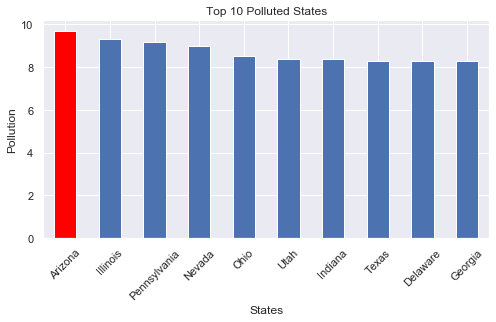

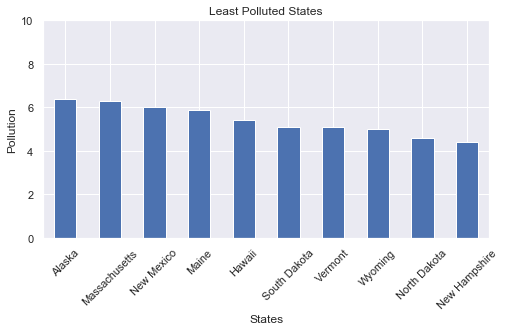

In [35]:
# Most polluted and least polluted states

pollution = df1[['State','Pollution']]

sns.set(rc={'figure.figsize':(8,4)})
top10_polluted = pollution.head(10)
least_polluted = pollution.tail(10)

bar_color = ['C0'] * len(pollution)
bar_color[0] = 'red'
barcolor = ['C0'] * len(pollution)

plot = top10_polluted.plot(x='State',y='Pollution', kind='bar', color=bar_color)
plot.set_xlabel('States')
plot.set_ylabel('Pollution')
plot.set_title('Top 10 Polluted States')
plot.get_legend().remove()
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

plot2 = least_polluted.plot(x='State',y='Pollution', kind='bar', color=barcolor)
plot2.set_xlabel('States')
plot2.set_ylabel('Pollution')
plot2.set_title('Least Polluted States')
plot2.get_legend().remove()
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=45)
plot2.set(ylim=(0, 10));

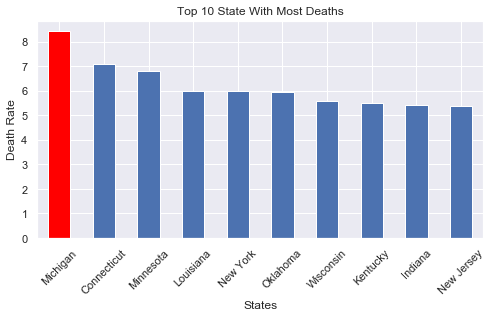

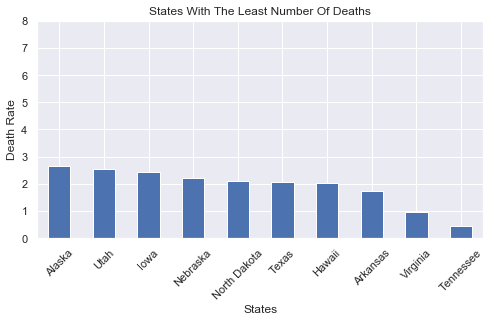

In [34]:
# Visualize the state with most and least number of deaths

death = df1[['State','Death Rate']].sort_values(by='Death Rate', ascending=False)

sns.set(rc={'figure.figsize':(8,4)})
top10_death = death.head(10)
least_death = death.tail(10)

bar_color = ['C0'] * len(death)
bar_color[0] = 'red'
barcolor = ['C0'] * len(death)

plot = top10_death.plot(x='State',y='Death Rate', kind='bar', color=bar_color)
plot.set_xlabel('States')
plot.set_ylabel('Death Rate')
plot.set_title('Top 10 State With Most Deaths')
plot.get_legend().remove()
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

plot2 = least_death.plot(x='State',y='Death Rate', kind='bar', color=barcolor)
plot2.set_xlabel('States')
plot2.set_ylabel('Death Rate')
plot2.set_title('States With The Least Number Of Deaths')
plot2.get_legend().remove()
plot2.set_xticklabels(plot2.get_xticklabels(),rotation=45)
plot2.set(ylim=(0, 8));

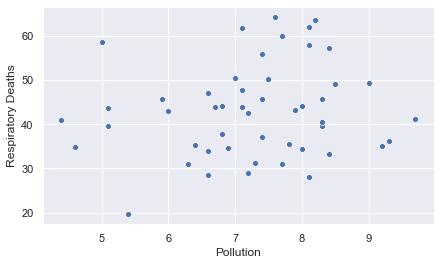

In [27]:
# Relationship between air pollution and respiratory deaths (2018) before the COVID-19 pandemic

sns.set(rc={'figure.figsize':(7,4)})
sns.scatterplot(x='Pollution', y='Respiratory Deaths', data=df1);

This scatterplot shows a very weak positive, linear association between air pollution index and respiratory deaths. There are a few outliers in the data.

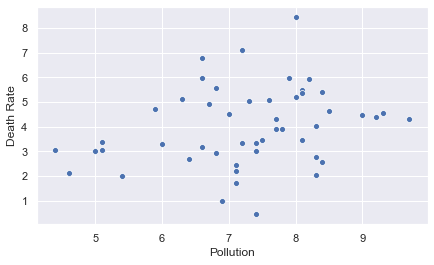

In [28]:
# Relationship between air pollution and Covid-19 deaths

sns.scatterplot(x='Pollution', y='Death Rate', data=df1);

This scatterplot shows the relationship between air pollution and Covid-19 death rates which is what we were interested to look at in the first place. There is a weak positive association between the two variables, with a few possible outliers.

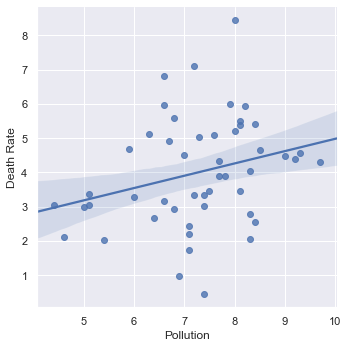

In [29]:
# lmplot: scatter plot with a linear regression line computed and overlaid onto the data

sns.lmplot(x='Pollution', y='Death Rate', data=df1);

The weak association found between air pollution and death rates does not necessarily indicate a causal link. For example, pollution levels are generally higher in the most densely populated areas and population density favours the spread of the virus since it makes social distancing more difficult. Therefore, the relationship between population density and death rates would be interesting to look at as well.

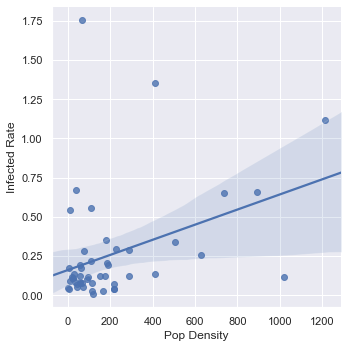

In [30]:
sns.lmplot(x='Pop Density', y='Infected Rate', data=df);

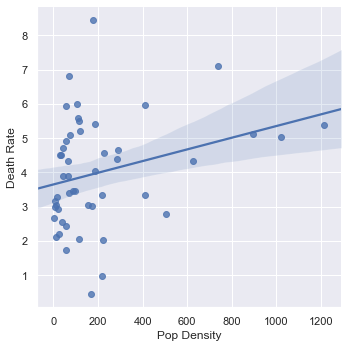

In [31]:
sns.lmplot(x='Pop Density', y='Death Rate', data=df);

Positive associations can be observed between population density and infected rates, as well as deaths rates. However, there are a few outliers.

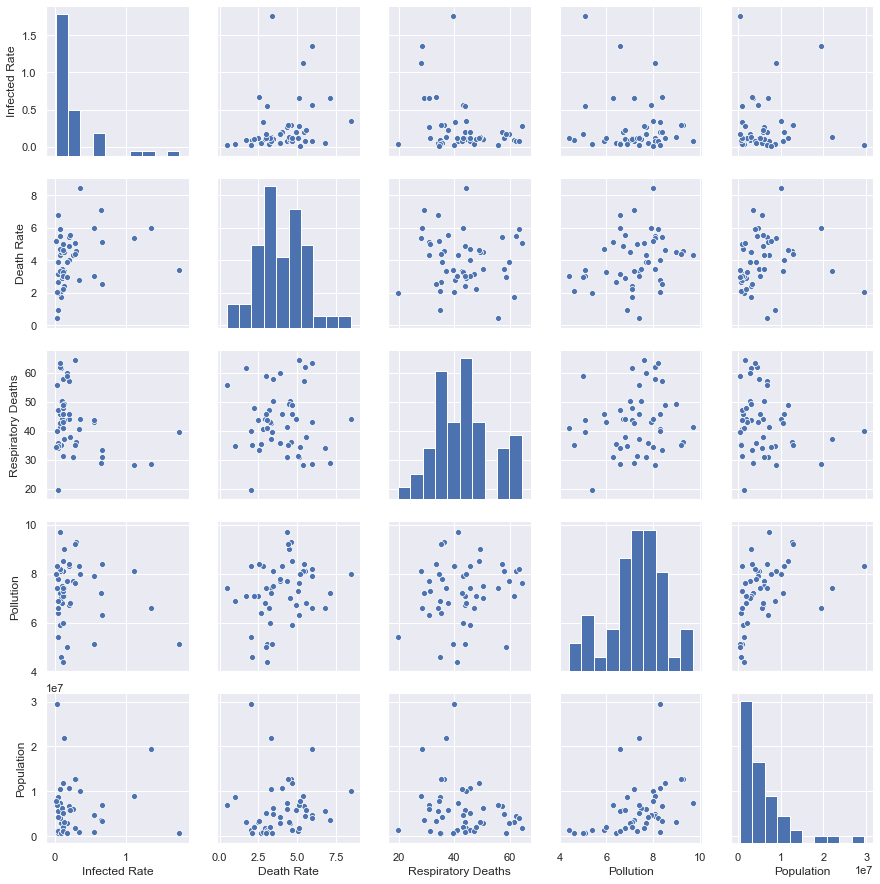

In [15]:
# Using pairplot to visualize plots of different combinations and to look for interesting patterns between features.

df2 = df[['Infected Rate','Death Rate','Respiratory Deaths','Pollution','Population']]
sns.pairplot(df2, height=2.5);

By studying the results above, a positive association between population and pollution can be observed. \
The death rate seems to increase with increasing number of population and air pollution index (weak positive association). 


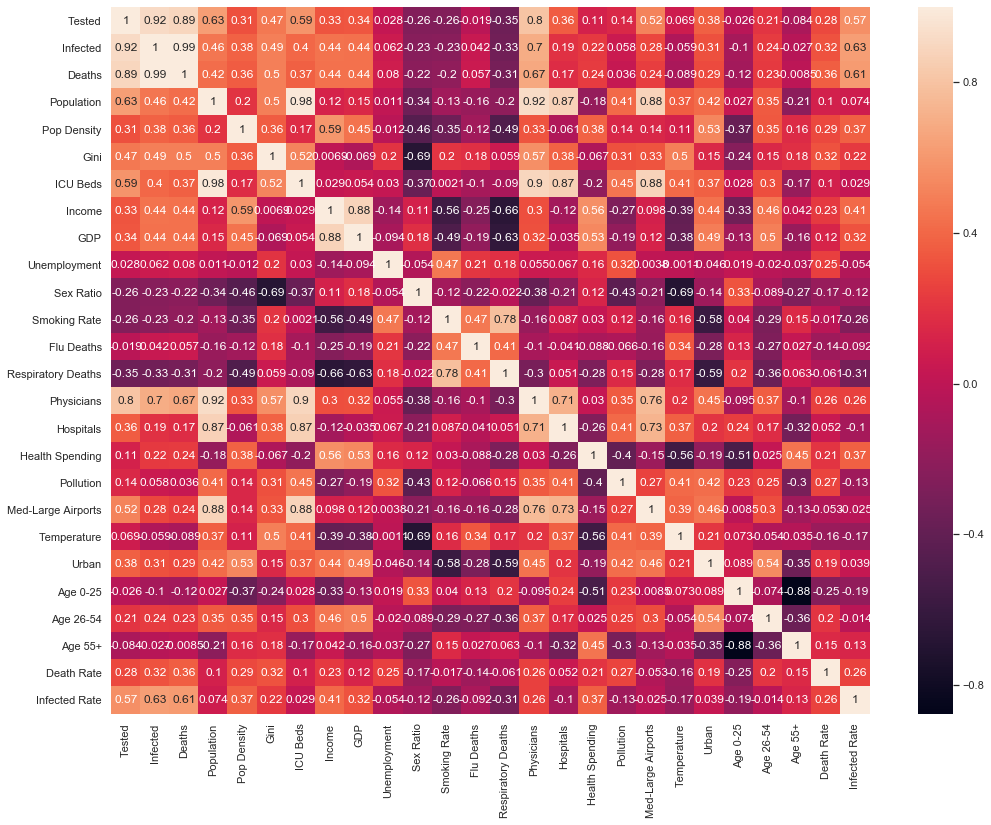

In [36]:
# Heatmap to look at correlations between different attributes

plt.figure(figsize=(17,13))
sns.heatmap(df.corr(), annot=True)

b, t = plt.ylim() 
b += 0.5
t -= 0.5
plt.ylim(b, t) 
plt.show()

#### Conclusion

Although initial observations show that there is a possible connection between exposure to air pollution and Covid-19 mortality, other factors could also explain why highly polluted states concentrate higher number of deaths due to Covid-19. There is not enough evidence to conclude that air pollution increases the risk of covid-19 deaths. Further testing should be done to study the effects of relevant predictors for covid-19. 

#### References

Sun Z, Zhu D (2019) Exposure to outdoor air pollution and its human health outcomes: A scoping review. PLoS ONE 14(5): e0216550. https://doi.org/10.1371/journal.pone.0216550

Wölfel R, Corman VM, Guggemos W et al (2020) Virological assessment of hospitalized patients with COVID-2019. Nature. https://doi.org/10.1038/s41586-020-2196-x

https://projects.iq.harvard.edu/covid-pm